In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

# Dataset 1

In [2]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


1) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

In [4]:
df.date.head()

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
Name: date, dtype: datetime64[ns]

In [5]:
df = df.set_index('date').sort_index()

In [6]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [7]:
df['day'] = df.index.day_name()

In [8]:
df.head()

,temp,day
date,,
2010-01-01 00:00:00,47.80,Friday
2010-01-01 01:00:00,47.40,Friday
2010-01-01 02:00:00,46.90,Friday
2010-01-01 03:00:00,46.50,Friday
2010-01-01 04:00:00,46.00,Friday


In [9]:
df.asfreq('D', method = None)

,temp,day
date,,
2010-01-01,47.80,Friday
2010-01-02,47.90,Saturday
2010-01-03,48.00,Sunday
2010-01-04,48.10,Monday
2010-01-05,48.00,Tuesday
...,...,...
2010-12-27,47.60,Monday
2010-12-28,47.60,Tuesday
2010-12-29,47.60,Wednesday


In [10]:
df = df.resample('D').mean()

<AxesSubplot:xlabel='date'>

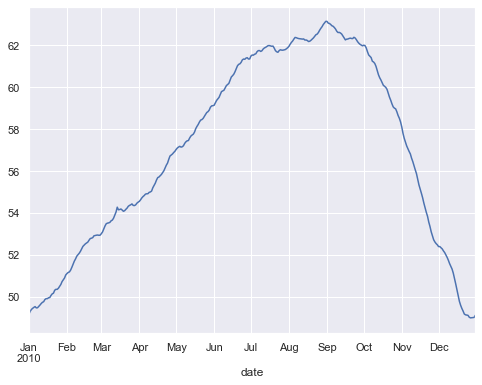

In [11]:
df.temp.plot()

2) Write the code necessary to visualize the minimum temperature over time.

In [101]:
def reset(df):
    df = data.sf_temps()
    df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')
    df = df.set_index('date').sort_index()
    return df 

In [114]:
def min_daily_temp(df):
    df = reset(df)
    df = df.resample('D')['temp'].agg(['min'])
    df['day'] = df.index.day_name()
    df.plot()
    return df

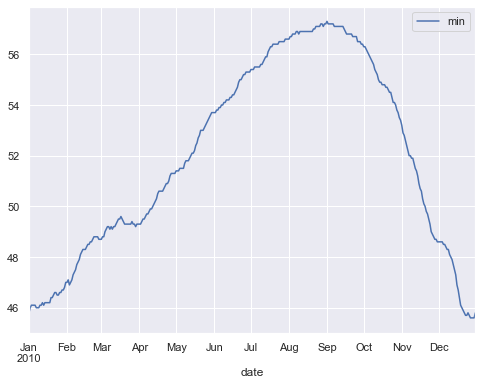

In [115]:
df = min_daily_temp(df)

In [116]:
df.head()

,min,day
date,,
2010-01-01,45.80,Friday
2010-01-02,46.00,Saturday
2010-01-03,46.10,Sunday
2010-01-04,46.10,Monday
2010-01-05,46.10,Tuesday


In [123]:
df.min()

max     53.20
day    Friday
dtype: object

3) Write the code necessary to visualize the maximum temperature over time.

In [118]:
def max_daily_temp(df):
    df = reset(df)
    df = df.resample('D')['temp'].agg(['max'])
    df['day'] = df.index.day_name()
    df.plot()
    return df

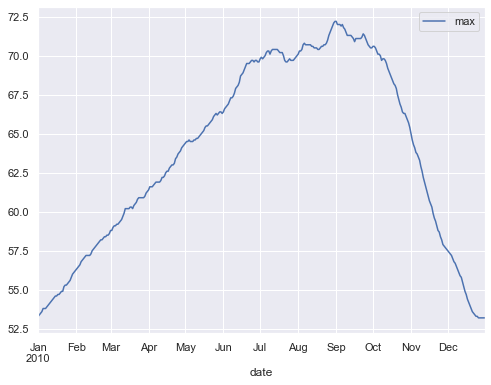

In [119]:
df = max_daily_temp(df)

In [122]:
df.max()

max        72.20
day    Wednesday
dtype: object

4) Which month is the coldest, on average?

In [159]:
def min_avg_month_temp(df): 
    df = reset(df)
    df = df.resample('M').mean()
    df = df.resample('M')['temp'].agg(['min'])
    df['month'] = df.index.month_name()
    df.plot()
    return df

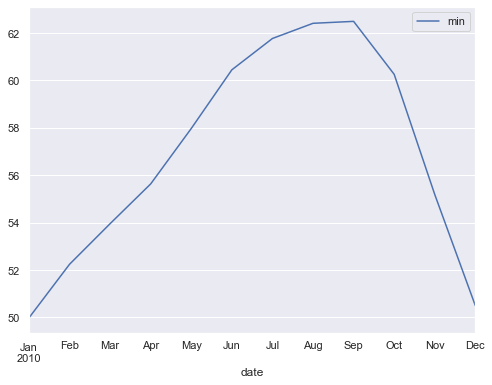

In [160]:
df = min_avg_month_temp(df)

In [130]:
df.head()

,min,month
date,,
2010-01-31,49.17,January
2010-02-28,51.10,February
2010-03-31,53.00,March
2010-04-30,54.55,April
2010-05-31,57.02,May


In [131]:
df.min()

min      48.99
month    April
dtype: object

5) Which month has the highest average temperature?

In [132]:
def max_avg_month_temp(df): 
    df = reset(df)
    df = df.resample('M').mean()
    df = df.resample('M')['temp'].agg(['max'])
    df['month'] = df.index.month_name()
    df.plot()
    return df

In [133]:
df.head()

,min,month
date,,
2010-01-31,49.17,January
2010-02-28,51.10,February
2010-03-31,53.00,March
2010-04-30,54.55,April
2010-05-31,57.02,May


In [135]:
df.max()

min          61.96
month    September
dtype: object

6) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

7) Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

# Dataset 2 

In [171]:
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


1) Which year and month combination has the highest amount of precipitation

In [172]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

In [173]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [174]:
df['year_month_combo'] = df['date'].dt.strftime('%Y-%m')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year_month_combo
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012-01
1,2012-01-02,10.90,10.60,2.80,4.50,rain,2012-01
2,2012-01-03,0.80,11.70,7.20,2.30,rain,2012-01
3,2012-01-04,20.30,12.20,5.60,4.70,rain,2012-01
4,2012-01-05,1.30,8.90,2.80,6.10,rain,2012-01


2) Visualize the amount of monthly precipitation over time.

In [181]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [206]:
df = df.resample('M').sum()

<AxesSubplot:xlabel='date'>

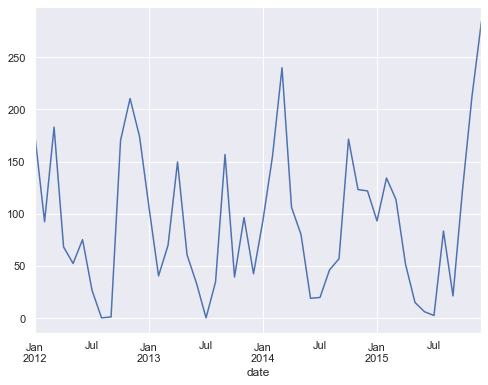

In [207]:
df.precipitation.plot()

3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [217]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [218]:
df = df.resample('M').sum()

<AxesSubplot:xlabel='date'>

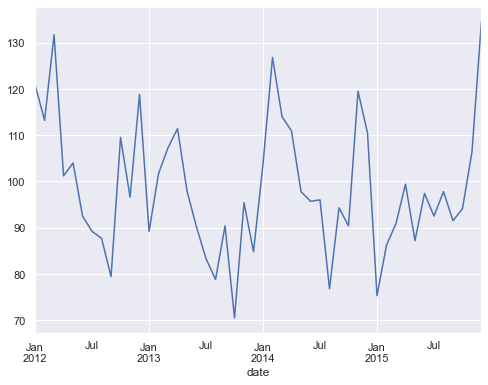

In [219]:
df.wind.plot()

4) Which year-month combination is the windiest?

5) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

6) In which month does it rain the most?

In [238]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [239]:
df.resample('M')

In [240]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [241]:
rain = df.weather == 'rain'

In [245]:
rain = pd.DataFrame(rain)

In [246]:
rain.head()

,weather
date,
2012-01-01,False
2012-01-02,True
2012-01-03,True
2012-01-04,True
2012-01-05,True


In [247]:
rain['month'] = df.index.month_name()

In [248]:
rain.head()

,weather,month
date,,
2012-01-01,False,January
2012-01-02,True,January
2012-01-03,True,January
2012-01-04,True,January
2012-01-05,True,January


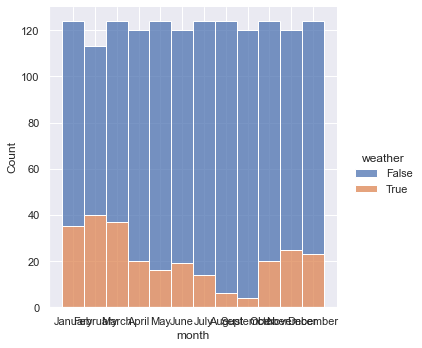

In [272]:
import seaborn as sns
sns.displot(rain, x="month", hue= rain.weather, multiple="stack")

In [278]:
# Feb is the the rainiest month of the year.

7) Which month has the most number of days with a non-zero amount of precipitation?

# Dataset 3

1) Convert any negative delays to 0.

In [220]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


2) Which hour of the day has the highest average delay?

3) Does the day of the week make a difference in the delay amount?

4) Does the month make a difference in the delay amount?

# Bonus Dataset

In [ ]:
from vega_datasets import data
data.iowa_electricity().head()


   - For each row, calculate the percentage of the year's total that energy source provided.
   - Lineplot of generation over time, color by source
   - Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
   - Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
   - Is the total generation increasing over time?
   - How would you control for increasing consumption over time when considering how much energy is coming from each source?
   - express each number as a % of the year's total


1) Use the sf_temps dataset

2) Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

3) How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

4) Create pretty labels for time plots

5) Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar
